In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

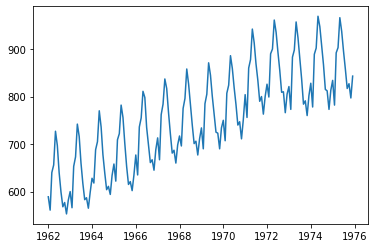

In [23]:
plt.plot(milk)
plt.show()

In [24]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.values.reshape(-1))

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [25]:
milk['daily'] = milk['milk'] / milk.index.days_in_month 

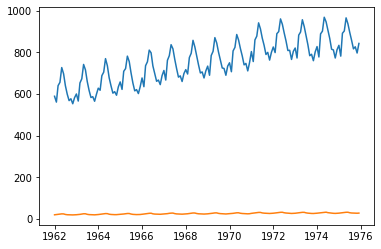

In [26]:
plt.plot(milk)
plt.show()

In [27]:
milk.sum()

milk     126791.000000
daily      4166.326662
dtype: float64

# Quiz 2

In [39]:
milk['daily_diff1'] = milk['daily'] - milk['daily'].shift(1)

In [40]:
milk['daily_diff12'] = milk['daily_diff1'] - milk['daily_diff1'].shift(12)

In [41]:
milk.dropna(inplace=True)

In [42]:
sm.tsa.stattools.adfuller(milk['daily_diff1'].values.reshape(-1))

(-2.487322546665277,
 0.11858943535701966,
 11,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 15.825269962802508)

In [43]:
sm.tsa.stattools.adfuller(milk['daily_diff12'].values.reshape(-1))

(-5.358717150428899,
 4.133380571715359e-06,
 11,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 -11.624885965848307)

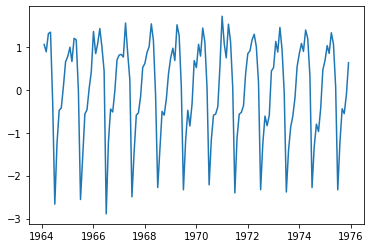

In [44]:
plt.plot(milk['daily_diff1'])

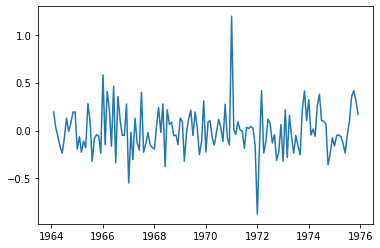

In [45]:
plt.plot(milk['daily_diff12'])

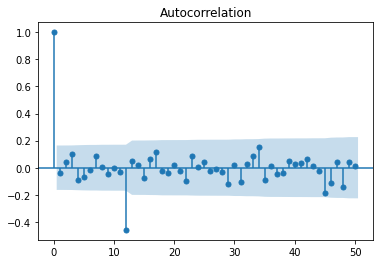

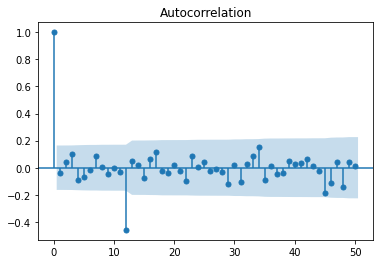

In [46]:
sm.graphics.tsa.plot_acf(milk['daily_diff12'].values.squeeze(), lags=50)

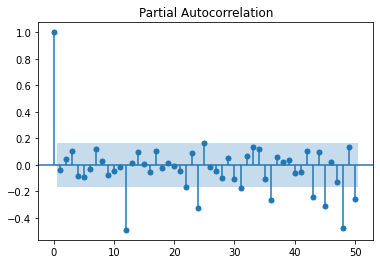

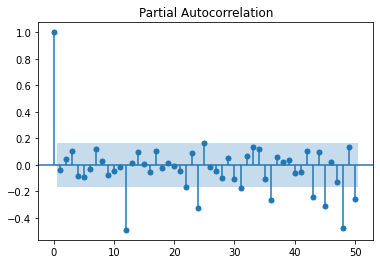

In [49]:
sm.graphics.tsa.plot_pacf(milk['daily_diff12'].values.squeeze(), lags=50)